In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [37]:
df=pd.read_csv('HeightWeight.csv')

In [38]:
df.head()

,Weight,Height
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [39]:
df.rename(columns={'Height': 'Weight', 'Weight': 'Height'}, inplace=True)
df

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
313,67.10120,122.3844
314,71.23661,129.2323
315,69.11946,138.2824
316,65.49848,144.0565


Text(0, 0.5, 'Weight')

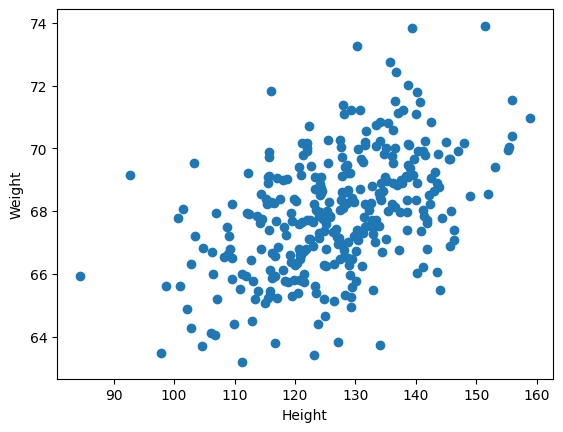

In [40]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Height')
plt.ylabel('Weight')


In [41]:
#gives correlation between datas, simple linear regression is 
#good for both positive and negative correlation
df.corr()  

,Height,Weight
Height,1.000000,0.480972
Weight,0.480972,1.000000


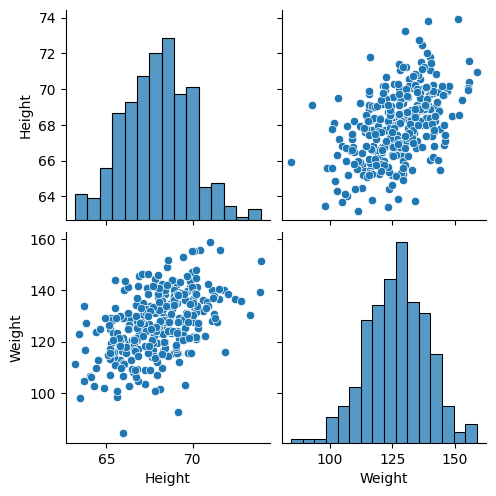

In [42]:
#seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [43]:
#divide the features into independent and dependent features
#X=df['Weight'] -->this makes X a series ; X= df[['Weight]]
#makes X a dataframe(check with type(X))
#always make sure that independent feature is saved as Dataframe or 2D array
#dependent feature should be in series or 1D
X=df[['Weight']] #independent feature
y=df['Height'] #dependent feature


In [44]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [45]:
#we use train test to split data into training and testing data this helps with underfitting over fitting etc
#parameters of train_test_split, test_Size is used to allocate proportion of data to be used as testing data , value lies between 0.0 to 1.0
#random_state:This parameter controls the random number generator used to shuffle the data before splitting. It's important to set this to a 
# fixed value if you want reproducible results.

from sklearn.model_selection import train_test_split


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

#Standardization
## if the value of x and y is greater the value will take a longer time to reach the global minima through gradient descent 
## for this we apply Z-score to independent value , which makes mean=0, and sigma(SD)= 1 and gives us new values for all the independent variable; formula Zscore = (Xith - mean)/sigma
## NOTE--- for TRAIN DATA -- WE USE(fit_transform), a library of sklearn because fit_transform uses mean and SD of the TRAINING INPUT DATA, 
## but for TEST DATA -- WE USE (transform), this uses the same mean and SD of the TRAINING DATA and not use its new mean or SD from TESTING DATA
## THIS IS DONE SO THAT TRAINING DATA HAS NO CLUE ABOUT THE TESTING DATA 

In [47]:

#Standardization
from sklearn.preprocessing import StandardScaler



In [48]:
##reason for taking fit_transform and transform alone is that we
## we dont want the training model to know anything about the test
## fit_transform uses the mean and SD of the data and calculates Zscore
## transform uses the same mean and SD calculated for the data in fit_transform
##this avoids training data to know anything about the test data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)


In [49]:
X_test=scaler.transform(X_test)

In [50]:
##Apply simple linear regression
from sklearn.linear_model import LinearRegression

In [51]:
regression=LinearRegression(n_jobs=-1)

In [52]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [53]:
regression.coef_   #gives value of slope/coefficient 

array([1.01441489])

In [54]:
regression.intercept_  #gives the value of intercept

np.float64(68.03306920168068)

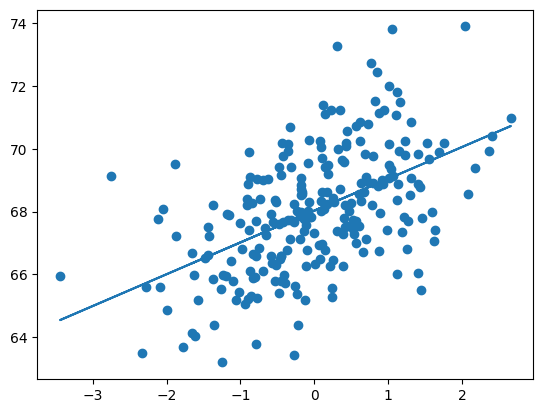

In [56]:
##plot the best fit line with respect to training data
plt.scatter(X_train, y_train)
plt.plot(X_train,regression.predict(X_train))

### PREDCITION OF THE TEST DATA
1. PREDICTED HEIGHT OUTPUT =  INTERCEPT +COEFF(WEIGHTS)
2. y_pred_test = 68.03 + 1.01(X_test)

In [57]:
##prediction for the test data
y_pred=regression.predict(X_test)

In [59]:
##Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [61]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

3.0628448118800966
1.4131856753826852
1.750098514907117


### R SQUARE FORMULA
R^2=1-SSR/SST
R^2=Coefficient of determination
SSR=sum of squares of residuals
SST=total sum of squares

In [63]:
from sklearn.metrics import r2_score

In [65]:
score=r2_score(y_test,y_pred)
print(score) # very low value shows that the independent variables dont predict the depedent variable correctly

0.03905662183355252


### ADJUSTED R2=1-[(1-R2)*(n-1)(n-k-1)]
R2=the R2 of the model n
k= the number of observations k 
The number of predictor variables

In [67]:
##display the adjusted R squared 
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.02673683493398271

In [70]:

pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 640.0 kB/s eta 0:00:16
   ---------------------------------------- 0.0/9.8 MB 487.6 kB/s eta 0:00:21
   ---------------------------------------- 0.1/9.8 MB 655.4 kB/s eta 0:00:15
   ---------------------------------------- 0.1/9.8 MB 654.9 kB/s eta 0:00:15
    --------------------------------------- 0.2/9.8 MB 701.4 kB/s eta 0:00:14
    --------------------------------------- 0.2/9.8 MB 737.3 kB/s eta 0:00:14
    --------------------------------------- 0.2/9.8 MB 724.0 kB/s eta 0:00:14
   - -------------------------------------- 0.3/9.8 MB 714.4 kB/s eta 0:00:14
   - -------------------------------------- 0.3/9.8 MB 707.1 kB/s eta 0:00:14
   - -------------------------------------- 0.3/9.8 MB 724.7 kB/s eta 0:00:14
   - -------------------------------------- 0.4/9.8 MB 717.9 kB/s eta 0:00:14
   - -------------------------------------- 0.4/9.8 MB 734.3 kB/s eta 0:0

In [71]:
import statsmodels.api as sm

In [72]:
model=sm.OLS(y_train,X_train).fit()

In [74]:
prediction=model.predict(X_test)
print(prediction)

[-1.95855159 -0.12447197  0.27207368 -0.19987885 -0.47927422  0.32421974
 -0.28223744  0.11818225  0.19738022  0.51719169  0.63538721 -0.50981028
  0.15448374 -0.57469836  0.62753129  0.22038388  0.22443213 -0.90263951
 -0.3368224  -1.00594445  0.70988158 -0.6265126   0.15406896  0.16361718
  1.09721083 -0.87139833 -0.66847168  0.81112922 -0.36547536 -1.43277729
 -1.40447275 -0.26066892 -0.13664159  1.03651202  0.22721115  0.54027001
 -1.79335327  1.58816856  0.03147677  0.04201217  0.83102204 -1.12443032
 -1.96051765 -0.4080732   1.5959913   1.31823016  0.80982681 -0.00462562
 -1.05234997  2.40008255  0.1351799   1.21596216  0.06621039  0.19239457
  1.37114771  1.22109713 -0.98591061  0.18978975  1.27797167  1.00217659
  1.22157827  0.06217044 -1.18654768 -1.62501093  2.44692773  1.00865544
  0.58171476  0.3079521  -0.25720966  0.30302452  0.98201002 -0.89769534
  0.10782106  1.86711597 -0.47210684  0.74042593  1.38534975 -0.82838571
 -0.86105373  0.83812306]


In [76]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.004
Method:                 Least Squares   F-statistic:                            0.05266
Date:                Tue, 22 Oct 2024   Prob (F-statistic):                       0.819
Time:                        10:15:57   Log-Likelihood:                         -1342.1
No. Observations:                 238   AIC:                                      2686.
Df Residuals:                     237   BIC:                                      2690.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [82]:
regression.predict(scaler.transform([[72]])) #prediction of new data

c:\Users\Lenovo\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([63.51656506])